In [2]:
#librerías
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#datos de MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()


In [4]:
# Preprocesamiento de datos
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1)).astype('float32') / 255


In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [6]:
# Construir el modelo de la CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [7]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Entrenar el modelo
epochs = 10
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 45s 59ms/step - loss: 0.1848 - accuracy: 0.9470 - val_loss: 0.0591 - val_accuracy: 0.9833
Epoch 2/10
750/750 [==============================] - 43s 58ms/step - loss: 0.0516 - accuracy: 0.9841 - val_loss: 0.0531 - val_accuracy: 0.9847
Epoch 3/10
750/750 [==============================] - 41s 55ms/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0457 - val_accuracy: 0.9871
Epoch 4/10
750/750 [==============================] - 42s 56ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0362 - val_accuracy: 0.9892
Epoch 5/10
750/750 [==============================] - 42s 55ms/step - loss: 0.0202 - accuracy: 0.9938 - val_loss: 0.0456 - val_accuracy: 0.9872
Epoch 6/10
750/750 [==============================] - 41s 55ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0388 - val_accuracy: 0.9892
Epoch 7/10
750/750 [==============================] - 40s 53ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0486 - val_accuracy:

In [9]:
# Evaluar el modelo con el conjunto de prueba
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Exactitud en el conjunto de prueba: {test_acc}")


313/313 [==============================] - 3s 8ms/step - loss: 0.0430 - accuracy: 0.9893
Exactitud en el conjunto de prueba: 0.989300012588501


1/1 [==============================] - 0s 22ms/step


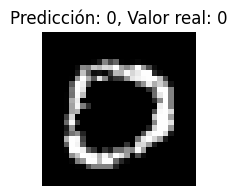

1/1 [==============================] - 0s 32ms/step


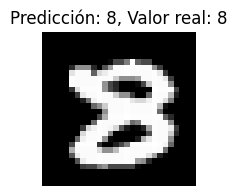

1/1 [==============================] - 0s 26ms/step


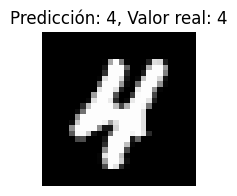

1/1 [==============================] - 0s 76ms/step


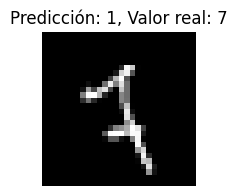

1/1 [==============================] - 0s 40ms/step


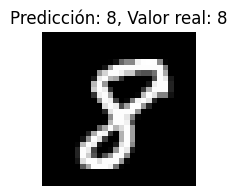

1/1 [==============================] - 0s 44ms/step


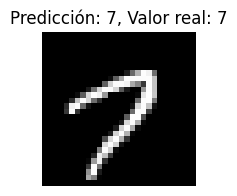

1/1 [==============================] - 0s 39ms/step


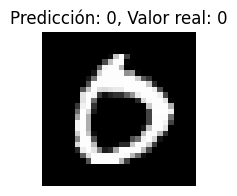

In [11]:
# 5 predicciones
for i in range(7):
    random_idx = np.random.randint(0, test_data.shape[0])
    sample = test_data[random_idx]
    sample_label = test_labels[random_idx]
    prediction = np.argmax(model.predict(sample.reshape(1, 28, 28, 1)))
    true_label = np.argmax(sample_label)

    plt.figure(figsize=(2, 2))
    plt.imshow(sample.reshape(28, 28), cmap='gray')
    plt.title(f"Predicción: {prediction}, Valor real: {true_label}")
    plt.axis('off')
    plt.show()
